<a href="https://colab.research.google.com/github/aysekonus/LogisticRegression_PyTorch/blob/main/AdalineSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ADALINE with Stochastic Gradient Descent (Minibatch)**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [9]:
df = pd.read_csv('./dataset/iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[60:120]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
115,6.4,3.2,5.3,2.3,1
116,6.5,3.0,5.5,1.8,1
117,7.7,3.8,6.7,2.2,1
118,7.7,2.6,6.9,2.3,1
119,6.0,2.2,5.0,1.5,1


In [10]:
X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize
mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

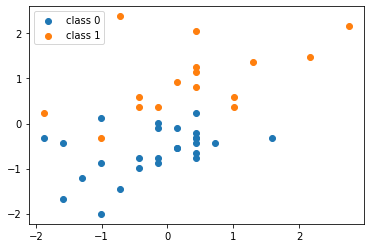

In [13]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1')
plt.legend()
plt.show()

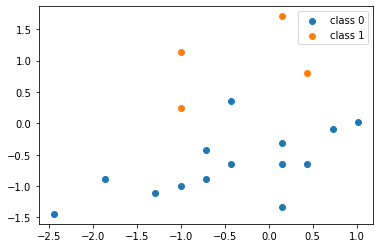

In [14]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1')
plt.legend()
plt.show()

In [15]:
class Adaline():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = netinputs
        return activations.view(-1)
        
    def backward(self, x, yhat, y):  
        grad_loss_yhat = 2*(yhat - y)
        
        grad_yhat_weights = x
        grad_yhat_bias = 1.
        
        grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1, 1)) / y.size(0)
        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)
        
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [16]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []
    
    torch.manual_seed(seed)
    for e in range(num_epochs):
        
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)
        
        for minibatch_idx in minibatches:

            # Compute outputs 
            yhat = model.forward(x[minibatch_idx])

            # Compute gradients 
            negative_grad_w, negative_grad_b = \
                model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

            # Update weights
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b
            
            # Logging 
            minibatch_loss = loss(yhat, y[minibatch_idx])
            print('    Minibatch MSE: %.3f' % minibatch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)
    
    return cost

In [18]:
# Train model
model = Adaline(num_features=X_train.size(1))
cost = train(model, 
             X_train, y_train.float(),
             num_epochs=20,
             learning_rate=0.1,
             seed=123,
             minibatch_size=10)

    Minibatch MSE: 0.400
    Minibatch MSE: 0.284
    Minibatch MSE: 0.406
    Minibatch MSE: 0.030
    Minibatch MSE: 0.007
Epoch: 001 | MSE: 0.13991
    Minibatch MSE: 0.102
    Minibatch MSE: 0.130
    Minibatch MSE: 0.058
    Minibatch MSE: 0.162
    Minibatch MSE: 0.298
Epoch: 002 | MSE: 0.09361
    Minibatch MSE: 0.107
    Minibatch MSE: 0.102
    Minibatch MSE: 0.084
    Minibatch MSE: 0.089
    Minibatch MSE: 0.079
Epoch: 003 | MSE: 0.08980
    Minibatch MSE: 0.107
    Minibatch MSE: 0.084
    Minibatch MSE: 0.108
    Minibatch MSE: 0.085
    Minibatch MSE: 0.066
Epoch: 004 | MSE: 0.09004
    Minibatch MSE: 0.098
    Minibatch MSE: 0.120
    Minibatch MSE: 0.049
    Minibatch MSE: 0.080
    Minibatch MSE: 0.201
Epoch: 005 | MSE: 0.09690
    Minibatch MSE: 0.092
    Minibatch MSE: 0.099
    Minibatch MSE: 0.093
    Minibatch MSE: 0.093
    Minibatch MSE: 0.089
Epoch: 006 | MSE: 0.08951
    Minibatch MSE: 0.080
    Minibatch MSE: 0.104
    Minibatch MSE: 0.093
    Minibatch MSE: 

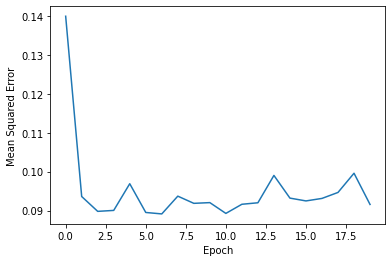

In [19]:
# Let's plot loss

plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [20]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[-0.0456],
        [ 0.4024]])
Bias tensor([0.3324])


In [21]:
def analytical_solution(x, y):
    Xb = torch.cat( (torch.ones((x.size(0), 1)), x), dim=1)
    w = torch.zeros(x.size(1))
    z = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
    return w, b

w, b = analytical_solution(X_train, y_train.float())
print('Analytical weights', w)
print('Analytical bias', b)

Analytical weights tensor([[-0.0701],
        [ 0.4180]])
Analytical bias tensor([0.3810])


In [23]:
# Evaluate on Evaluation Metric (Prediction Accuracy)

ones = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())
train_pred = model.forward(X_train)
train_acc = torch.mean((torch.where(train_pred > 0.5, ones, zeros).int() == y_train).float())

ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())
test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5, 
                 ones, 
                 zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Test Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 90.48
Test Accuracy: 94.44


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


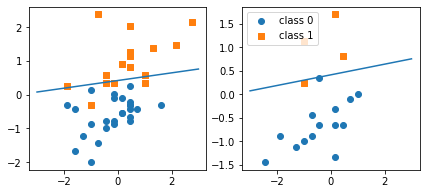

In [24]:
w, b = model.weights, model.bias - 0.5

x_min = -3
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 3
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()